<a href="https://colab.research.google.com/github/afiflh/Machine_Learning/blob/main/Modul11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 11: Convolutional Neural Network (CNN)

Nama : Afif Lukmanul Hakim

Kelas : TI-3G/02

NIM : 2141720262


**Praktikum 1**

Langkah 1 - Import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/Machine Learning/Pertemuan 11/dataset.zip', 'r') as zipobj:
  zipobj.extractall('/content/drive/MyDrive/Machine Learning/Pertemuan 11')

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

Langkah 2 - Pra Pengolahan Data

Pada tahap ini kita akan sedikit melakukan manipulasi pada citra yang digunakan. Manipulasi yang dilakukan diantaranya adalah normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.

Langkah 2.1 - Pra pengolahan Data Training

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Machine Learning/Pertemuan 11/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


Langkah 2.2 - Pra Pengolahan Dataa Testing

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Machine Learning/Pertemuan 11/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


Langkah 3 - Pembuatan Model CNN

Langkah 3.1 - Inisiasi Model CNN

In [ ]:
cnn = tf.keras.models.Sequential()

Langkah 3.2 - Pembuatan Layer Konvolusi 1

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

Langkah 3.3 - Pembuatan Layer Pooling 1

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Langkah 3.5 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

Langkah 3.6 - Fully Connected Layer 1 (INPUT)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

Langkah 3.7 - Fully Connected Layer 2 (OUTPUT)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Langkah 3.8 - Compile Model CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Langkah 4 - Fit CNN

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
 93/250 [==========>...................] - ETA: 11:36 - loss: 0.7007 - accuracy: 0.5171

Langkah 5 - Prediksi dengan 1 Citra

Pada langkah ini, melakukan prediksi pada 1 citra anjing dan kucing

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Machine Learning/Pertemuan 11/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 142ms/step


**Praktikum 2**

Langkah 1 - Load Library

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Langkah 2 - Unduh Dataset CIFAR

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 3s 0us/step


Langkah 3 - Verifikasi Data

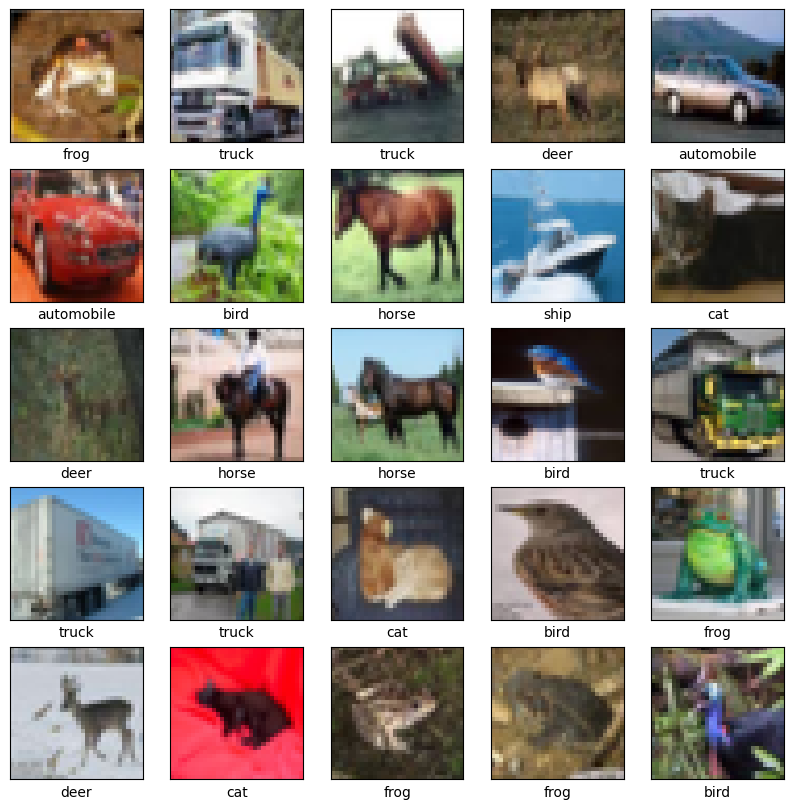

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Langkah 4 - Buat Model CNN

Langkah 4.1 - Buat Layer Konvolusi

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Langkah 4.2 - Cek Arsitektur Konvolusi

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

Langkah 4.3 - Tambahkan Layer Fully Connected

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Langkah 4.4 - Cek Arsitektur Model CNN

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Langkah 5 - Fit Model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 12s 6ms/step - loss: 1.5188 - accuracy: 0.4471 - val_loss: 1.2930 - val_accuracy: 0.5347
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1554 - accuracy: 0.5923 - val_loss: 1.0474 - val_accuracy: 0.6304
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0041 - accuracy: 0.6477 - val_loss: 1.0023 - val_accuracy: 0.6440
Epoch 4/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9088 - accuracy: 0.6830 - val_loss: 0.9896 - val_accuracy: 0.6566
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8379 - accuracy: 0.7085 - val_loss: 0.9059 - val_accuracy: 0.6883
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7781 - accuracy: 0.7276 - val_loss: 0.8625 - val_accuracy: 0.6972
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7306 - accuracy: 0.7441 - val_loss: 0.8407 - val_accuracy

Langkah 6 - Evaluasi Model

313/313 - 1s - loss: 0.8703 - accuracy: 0.7120 - 1s/epoch - 3ms/step


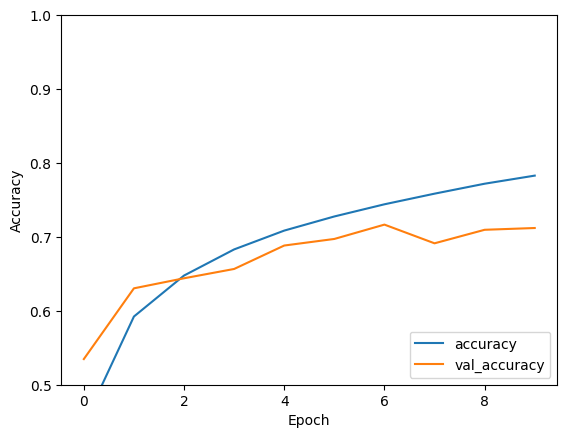

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Langkah 7 - Cetak Hasil Akurasi

In [ ]:
print(test_acc)

0.7120000123977661


# TUGAS

Modifikasi model CNN pada praktikum 2 hingga mendapatkan akurasi testing lebih dari 80%

**Langkah 1**

In [2]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

Langkah 2 - Membuat dataset CIFAR-10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


Langkah 3 - Normalisasi data dan konversi label ke vektor one-hot encoded

In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Langkah 4 - Memisahkan data latih menjadi data latih dan validasi

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Langkah 5 - Mendefinisikan model Convolutional Neural Network (CNN)

In [6]:
def cnn_model():
    model = Sequential()
    # First Conv layer
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Second Conv layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Third, fourth, fifth convolution layer
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Fully Connected layers
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.summary()

    return model

Langkah 6 - Membuat objek ImageDataGenerator dan mempersiapkan augmentasi data

In [7]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(X_train)

Langkah 7 - Membuat model dan mengompilasi

In [8]:
model = cnn_model()
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0003),
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 256)         0

Langkah 8 - Melatih model dengan ImageDataGenerator

In [9]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=len(X_train) // 64,
    epochs=50,
    validation_data=(X_valid, y_valid),
    verbose=1
)

Epoch 1/50
625/625 [==============================] - 52s 56ms/step - loss: 2.1739 - accuracy: 0.1917 - val_loss: 1.8744 - val_accuracy: 0.2890
Epoch 2/50
625/625 [==============================] - 35s 56ms/step - loss: 1.7577 - accuracy: 0.3427 - val_loss: 1.5569 - val_accuracy: 0.4204
Epoch 3/50
625/625 [==============================] - 34s 54ms/step - loss: 1.5612 - accuracy: 0.4364 - val_loss: 1.3645 - val_accuracy: 0.5109
Epoch 4/50
625/625 [==============================] - 34s 54ms/step - loss: 1.4287 - accuracy: 0.4980 - val_loss: 1.2369 - val_accuracy: 0.5560
Epoch 5/50
625/625 [==============================] - 34s 54ms/step - loss: 1.3329 - accuracy: 0.5420 - val_loss: 1.1035 - val_accuracy: 0.6118
Epoch 6/50
625/625 [==============================] - 34s 54ms/step - loss: 1.2539 - accuracy: 0.5767 - val_loss: 1.1089 - val_accuracy: 0.6172
Epoch 7/50
625/625 [==============================] - 34s 54ms/step - loss: 1.1839 - accuracy: 0.6059 - val_loss: 0.9768 - val_accuracy:

Langkah 9 - Mengevaluasi model pada set tes

In [10]:
scores = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.6516 - accuracy: 0.8375


Langkah 10 - Melakukan prediksi

<Axes: >

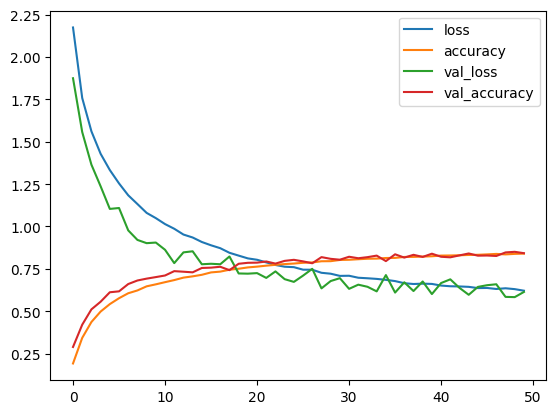

In [11]:
pd.DataFrame(history.history).plot()

Langkah 11 - Tampilkan laporan klasifikasi

In [12]:
scores = model.evaluate(X_test, y_test)
pred = model.predict(X_test)
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
errors = y_pred - y_true != 0
print(classification_report(y_true, y_pred))

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1000
           1       0.91      0.93      0.92      1000
           2       0.88      0.70      0.78      1000
           3       0.72      0.68      0.70      1000
           4       0.83      0.81      0.82      1000
           5       0.80      0.74      0.77      1000
           6       0.79      0.93      0.85      1000
           7       0.86      0.91      0.88      1000
           8       0.92      0.93      0.92      1000
           9       0.80      0.94      0.86      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



Langkah 12 - Menampilkan visualisasi hasil prediksi

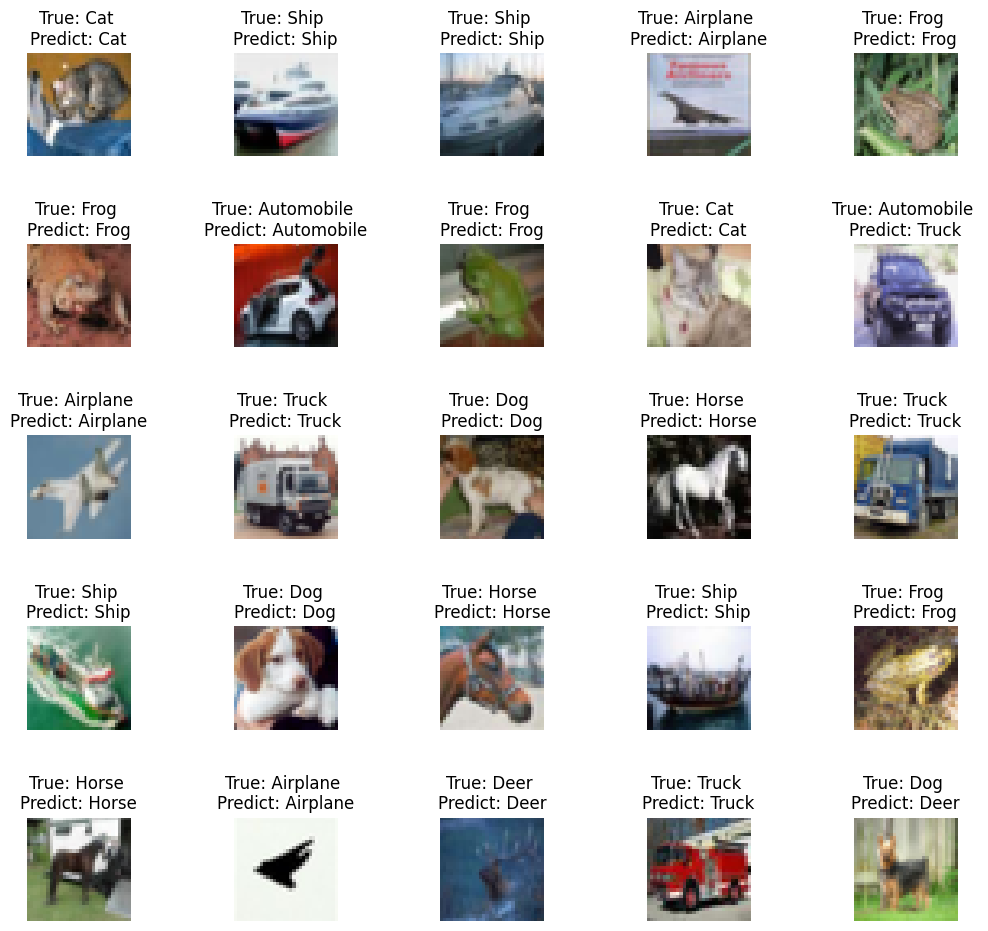

In [13]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(25):
    axes[i].imshow(X_test[i])
    axes[i].set_title('True: %s \nPredict: %s' % (labels[y_true[i]], labels[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

BUATLAH MODEL CNN UNTUK KLASIFIKASI DATASET MNIST

Langkah 1 - Memuat Dataset MNIST

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Langkah 2 - Normalisasi Gambar ke Rentang [0, 1]

In [15]:
# Normalisasi gambar ke rentang [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

Langkah 3 - Mengonversi Label ke Format One-Hot Encoding


In [16]:
# Perbaikan: Mengimpor to_categorical dari tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical

# Mengonversi label ke format one-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

Langkah 4 - Menampilkan Informasi tentang Dataset

In [17]:
# Menampilkan informasi tentang dataset
print("Jumlah data latihan:", len(train_images))
print("Jumlah data pengujian:", len(test_images))
print("Ukuran gambar:", train_images[0].shape)

Jumlah data latihan: 60000
Jumlah data pengujian: 10000
Ukuran gambar: (28, 28)


Langkah 5 - Membangun Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Membangun model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

Langkah 6 - Mengompilasi Model

In [19]:
# Mengompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Langkah 7 - Menampilkan Ringkasan Model

In [20]:
# Menampilkan ringkasan model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

Langkah 9 - Plot sejarah pelatihan

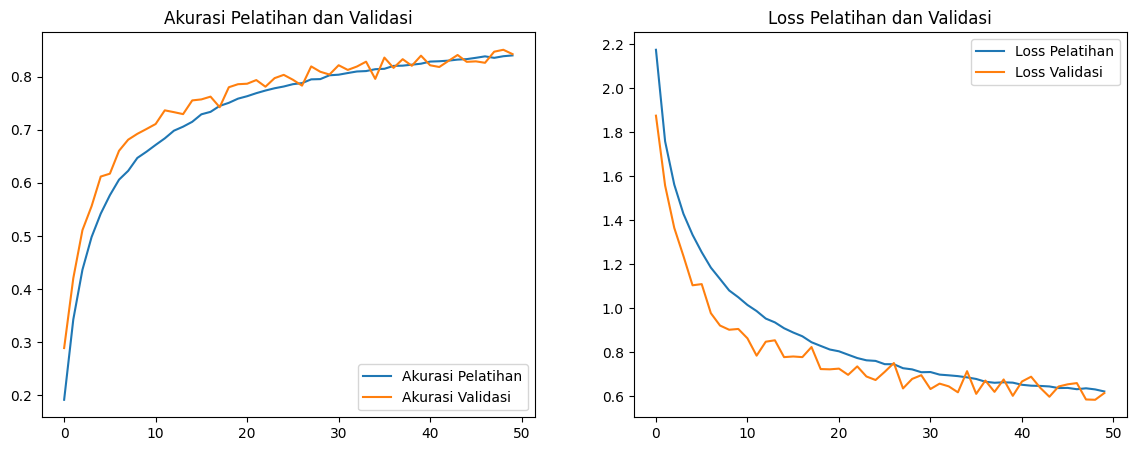

In [21]:
import matplotlib.pyplot as plt

# Plot sejarah pelatihan
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Akurasi Pelatihan dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.legend(loc='upper right')
plt.title('Loss Pelatihan dan Validasi')

plt.show()

Langkah 10 - Evaluasi Model pada Kumpulan Data Uji

In [22]:
# Evaluasi model pada kumpulan data uji
validation_loss, validation_accuracy = model.evaluate(test_images, test_labels, verbose=False)
print("Loss Validasi:", validation_loss)
print("Akurasi Validasi:", validation_accuracy)

Loss Validasi: 2.29988431930542
Akurasi Validasi: 0.09239999949932098


Langkah 11 - Menghasilkan Nilai Prediksi pada Kumpulan Data Uji

In [23]:
# Menghasilkan nilai prediksi pada kumpulan data uji
y_pred_enc = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


Langkah 12 - Mendekode Nilai Prediksi

In [24]:
# Mendekode nilai prediksi
y_pred = [np.argmax(i) for i in y_pred_enc]

Langkah 13 - Menampilkan laporan klasifikasi

In [25]:
print(classification_report(np.argmax(test_labels, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.10      0.83      0.18      1032
           3       0.04      0.03      0.03      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.50      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.28      0.03      0.05       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.09     10000
   macro avg       0.09      0.09      0.03     10000
weighted avg       0.09      0.09      0.03     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Langkah 14 - Membuat Matriks Konfusi dan Menampilkannya dengan Heatmap

Text(58.222222222222214, 0.5, 'Aktual')

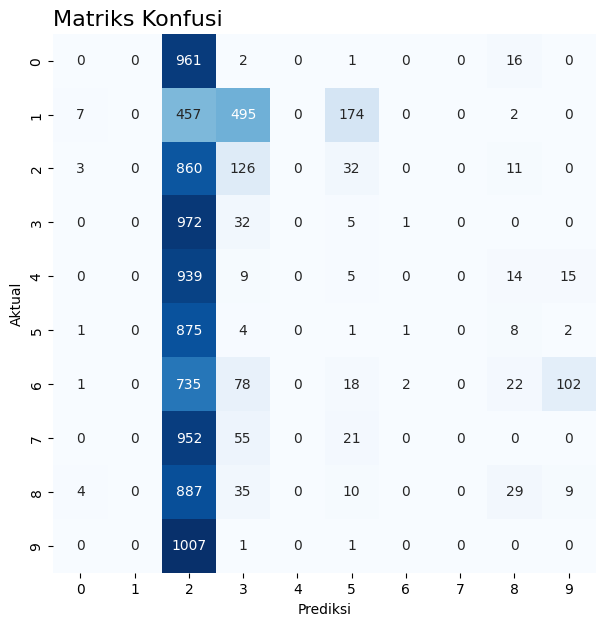

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat matriks konfusi dan menampilkannya dengan heatmap
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(np.argmax(test_labels, axis=1), y_pred), annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Matriks Konfusi', loc='left', fontsize=16)
ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')

Langkah 15 - Menampilkan Target yang Diprediksi pada Setiap Gambar (Label di atas gambar adalah label yang diprediksi)

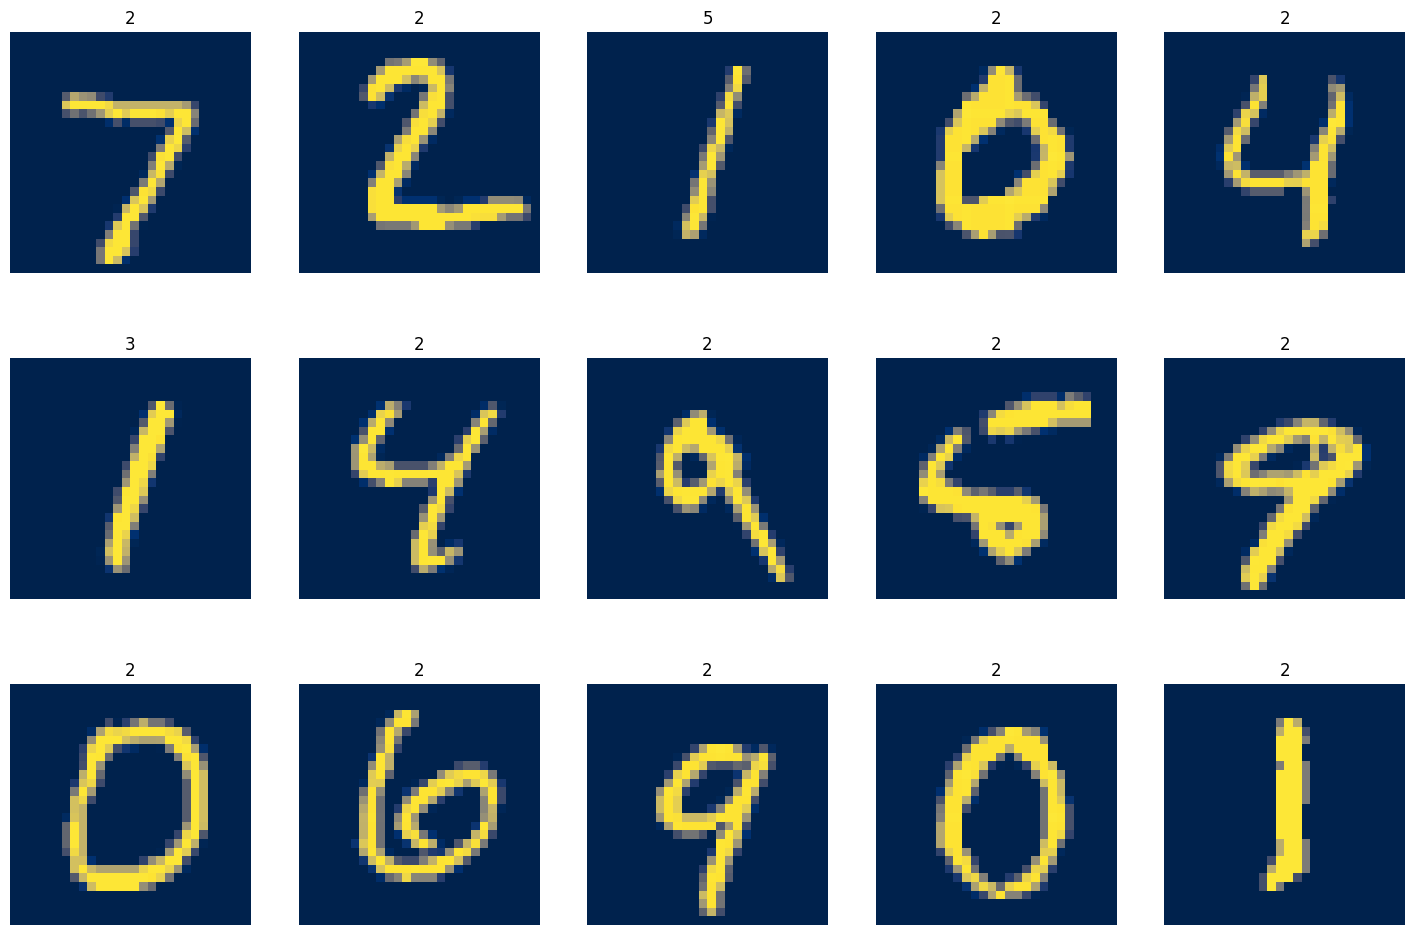

In [27]:
# Menampilkan target yang diprediksi pada setiap gambar
# (label di atas gambar adalah label yang diprediksi)
plt.figure(figsize=(18, 12))
for ind, row in enumerate(test_images[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')